#### Problem Stament



Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

Content

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [243]:
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder,PowerTransformer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import joblib 

### Basic EDA on dataset

In [39]:
import pandas as pd

df =pd.read_csv('happiness_score_dataset.csv')

In [20]:
df.shape

(158, 12)

In [22]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [23]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [24]:
len(df.Country.unique())

158

In [25]:
len(df.Region.unique())

10

In [26]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309882,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


##### Observation:
- looking at describe result we can see that there are outliers in some columns

In [27]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

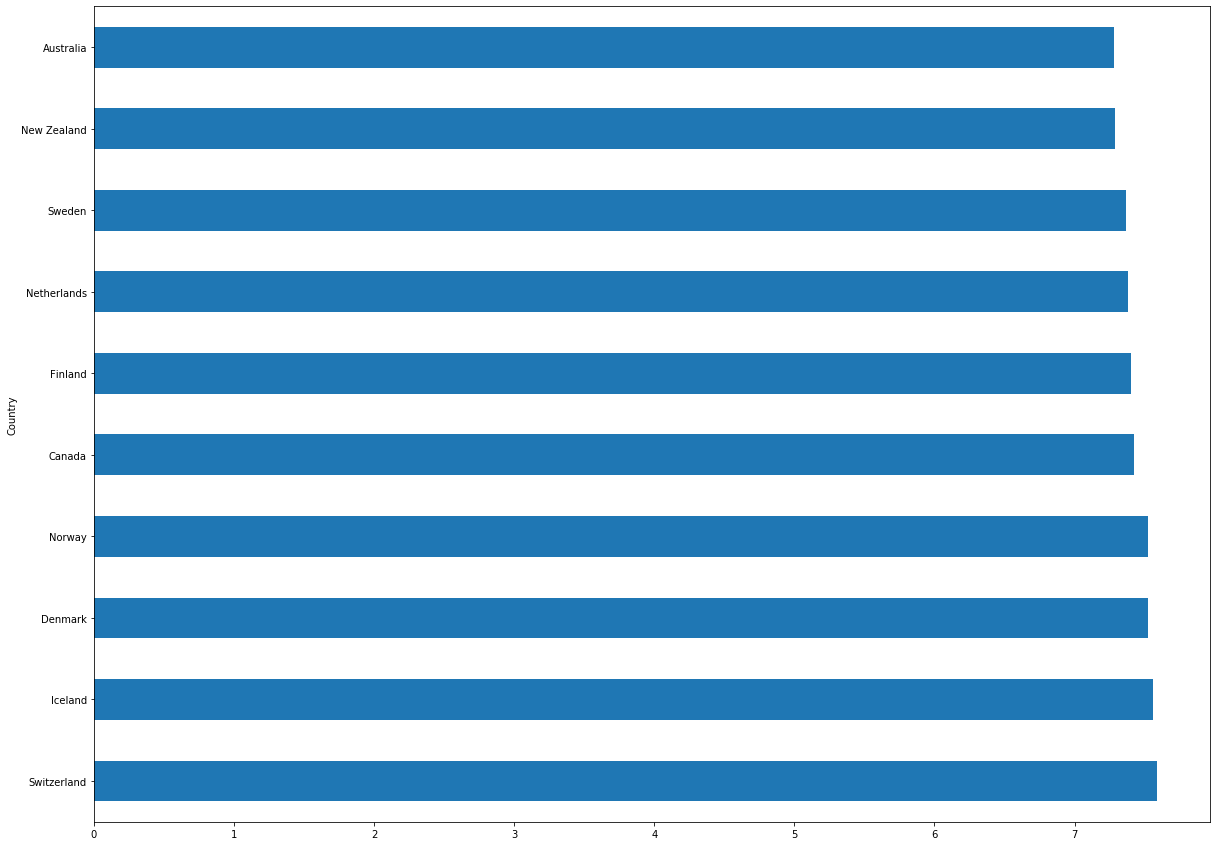

In [28]:
df.groupby('Country')['Happiness Score'].sum().sort_values(ascending=False)[0:10].plot(kind='barh')

##### Observation:
- Top 10 countries based on Hapiness Score

In [29]:
### top happy countries

df[['Country','Happiness Rank']].head(10)

,Country,Happiness Rank
0,Switzerland,1
1,Iceland,2
2,Denmark,3
3,Norway,4
4,Canada,5
5,Finland,6
6,Netherlands,7
7,Sweden,8
8,New Zealand,9
9,Australia,10


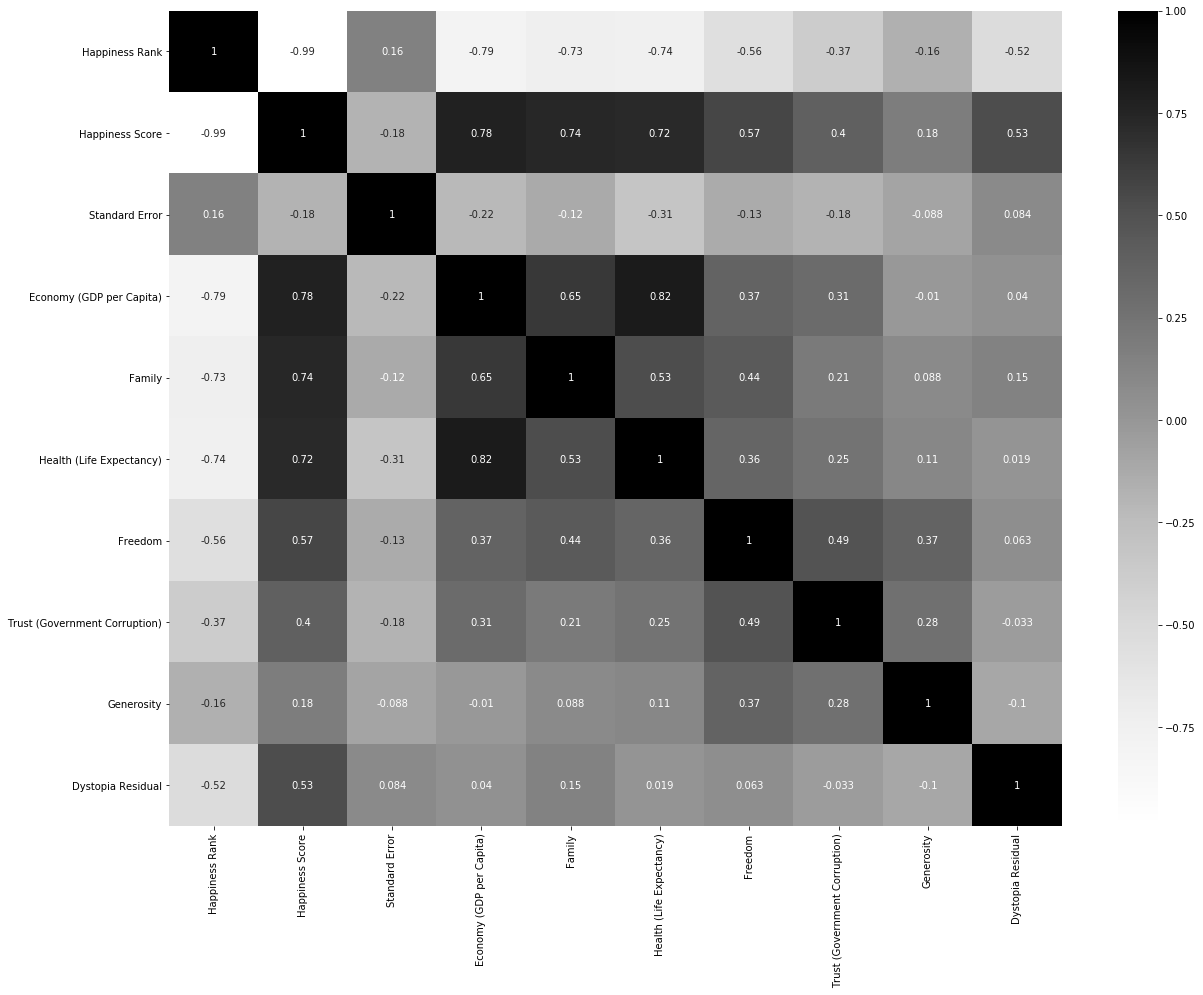

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 15)
corr = df.corr()

sns.heatmap(corr,cmap='Greys' ,annot=True)

##### Observation:
- We can observer multicolinearity in three features Economy, GDP and Health

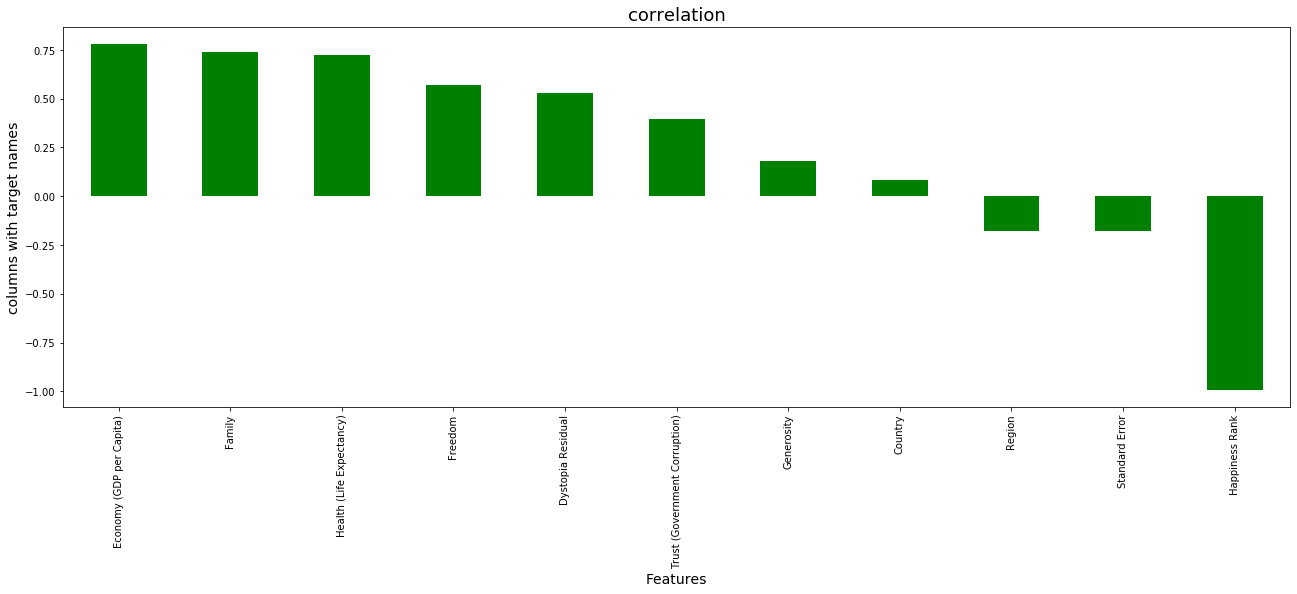

In [37]:
## to checl the positive and negative correlation

plt.figure(figsize=(22,7))
df.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

##### Observation:
- Positive correlation in Economy , Family and Health
- Negative correlation with respect to Happiness rank, which is expected

#### Label Encoding the Categorical Features

In [48]:
new_df = df.copy()
labelEncoder = LabelEncoder()
new_df['Country'] = labelEncoder.fit_transform(df['Country'])
new_df['Region'] = labelEncoder.fit_transform(df['Region'])

In [41]:
### using vif to find multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor


X = new_df.drop(columns=['Happiness Score'])
  

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                          feature        VIF
0                         Country   4.151430
1                          Region   5.620990
2                  Happiness Rank   5.167118
3                  Standard Error  10.016636
4        Economy (GDP per Capita)  24.945816
5                          Family  27.139956
6        Health (Life Expectancy)  26.245033
7                         Freedom  16.181917
8   Trust (Government Corruption)   3.617500
9                      Generosity   6.305456
10              Dystopia Residual  13.294882


##### Observation:
- Using VIF we can find the feature with High Multicolinearity (Economy,Family,Health)

[Text(0, 0, 'Western Europe'),
 Text(0, 0, 'Western Europe'),
 Text(0, 0, 'Western Europe'),
 Text(0, 0, 'Western Europe'),
 Text(0, 0, 'North America'),
 Text(0, 0, 'Western Europe'),
 Text(0, 0, 'Western Europe'),
 Text(0, 0, 'Western Europe'),
 Text(0, 0, 'Australia and New Zealand'),
 Text(0, 0, 'Australia and New Zealand')]

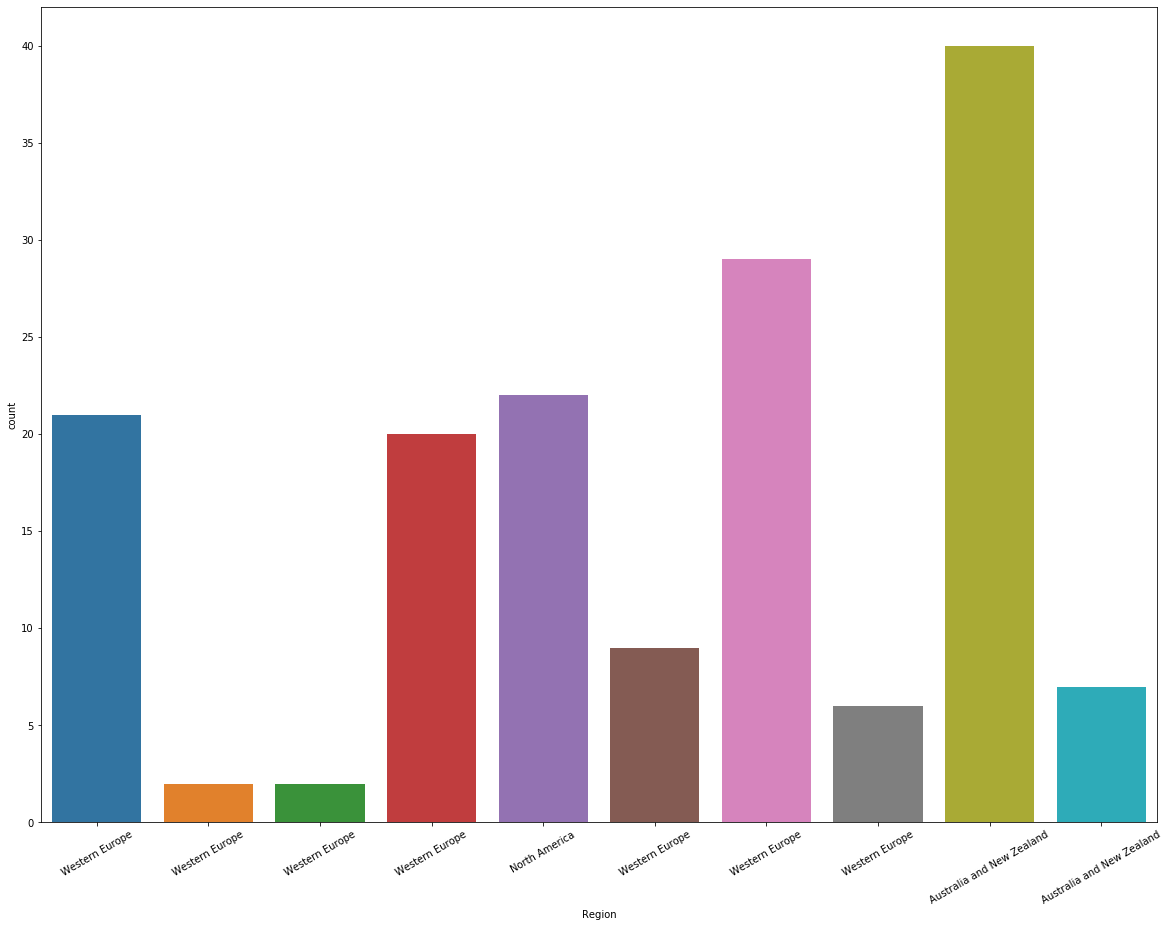

In [42]:
g = sns.countplot(df['Region'])

g.set_xticklabels(labels=df['Region'].tolist(), rotation=30)

##### Observation:
- Data Distribution based on regions

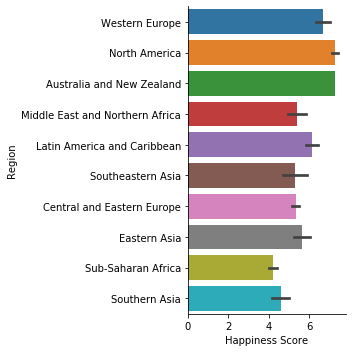

In [184]:
sns.catplot(x='Happiness Score',y='Region',data=df,kind='bar')

In [218]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


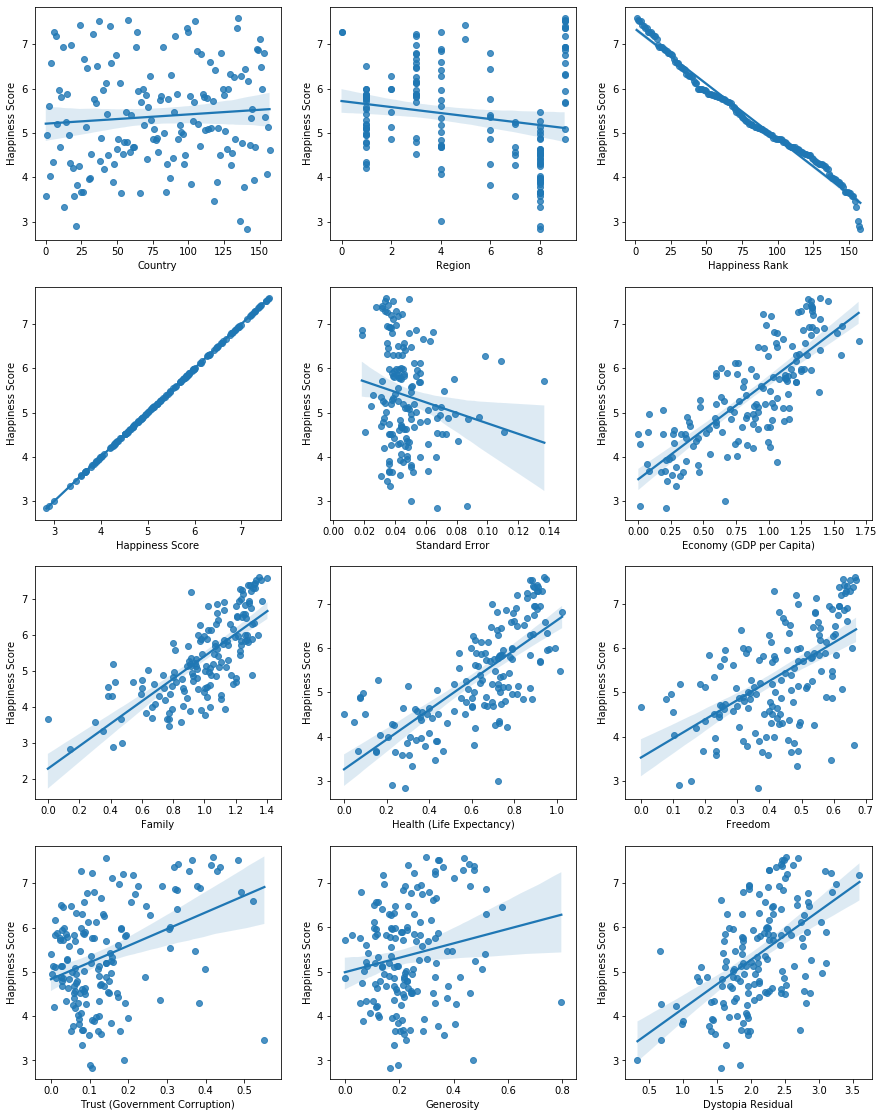

In [219]:
plt.figure(figsize= (15,30))

for i in enumerate(df.columns):
    plt.subplot(6,3,i[0] + 1)
    sns.regplot(x=i[1],y='Happiness Score',data=df)

# 

##### Observation:
- Using regplot we are able to observe many features have positive correlation with target feature

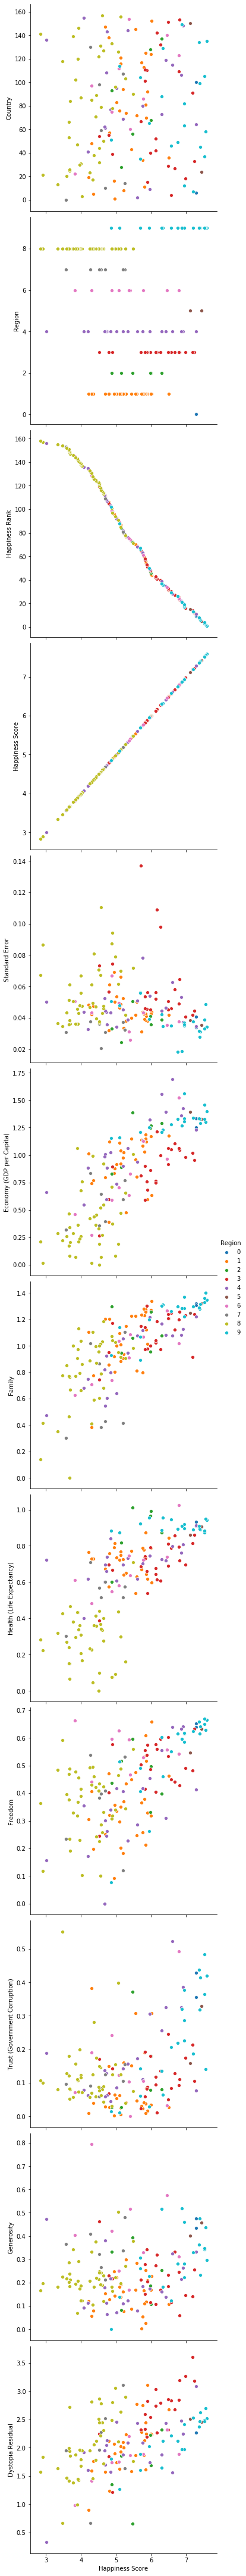

In [221]:
sns.pairplot(data=df, height = 5, hue='Region',
                  x_vars=['Happiness Score'],
                  y_vars=df.columns.tolist())

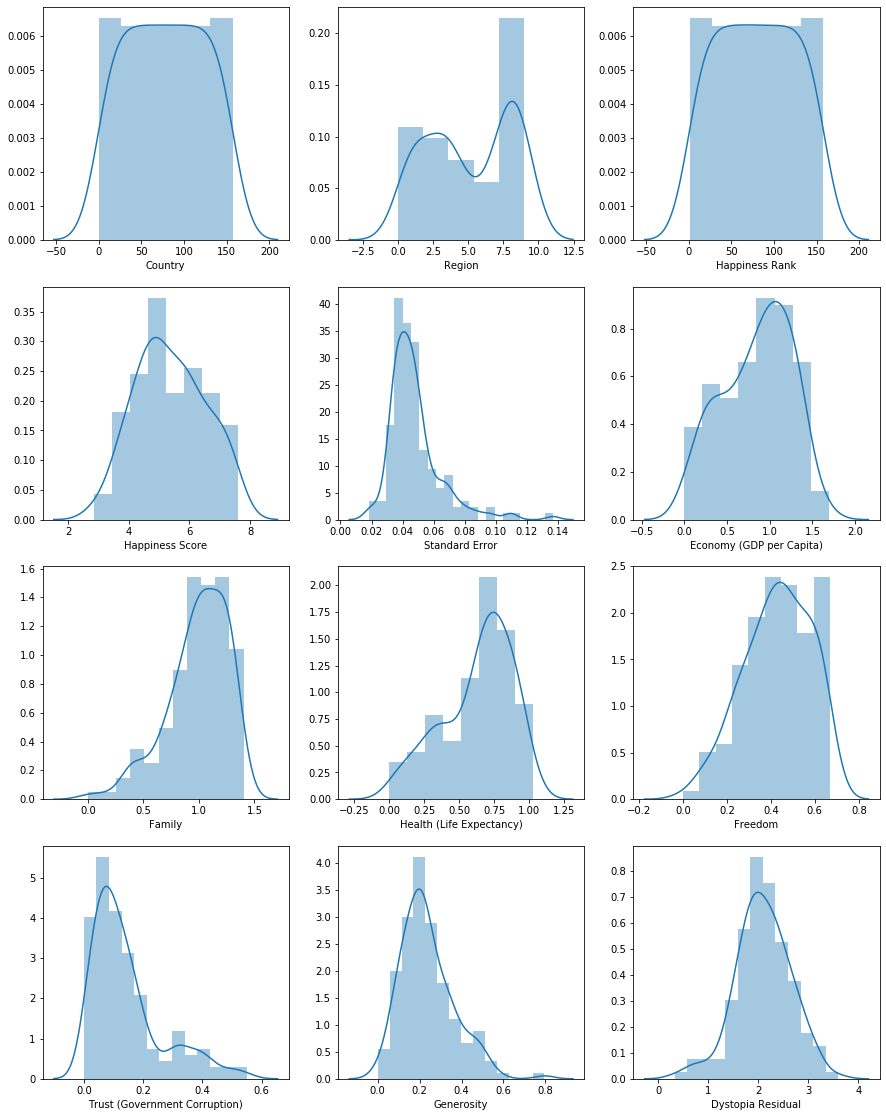

In [222]:
plt.figure(figsize= (15,30))

for i in enumerate(df._get_numeric_data().columns):
    plt.subplot(6,3,i[0] + 1)
    sns.distplot(df[i[1]])

##### Observation:
- we are able to find skewness in some features, which will be removed using PCA

In [223]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

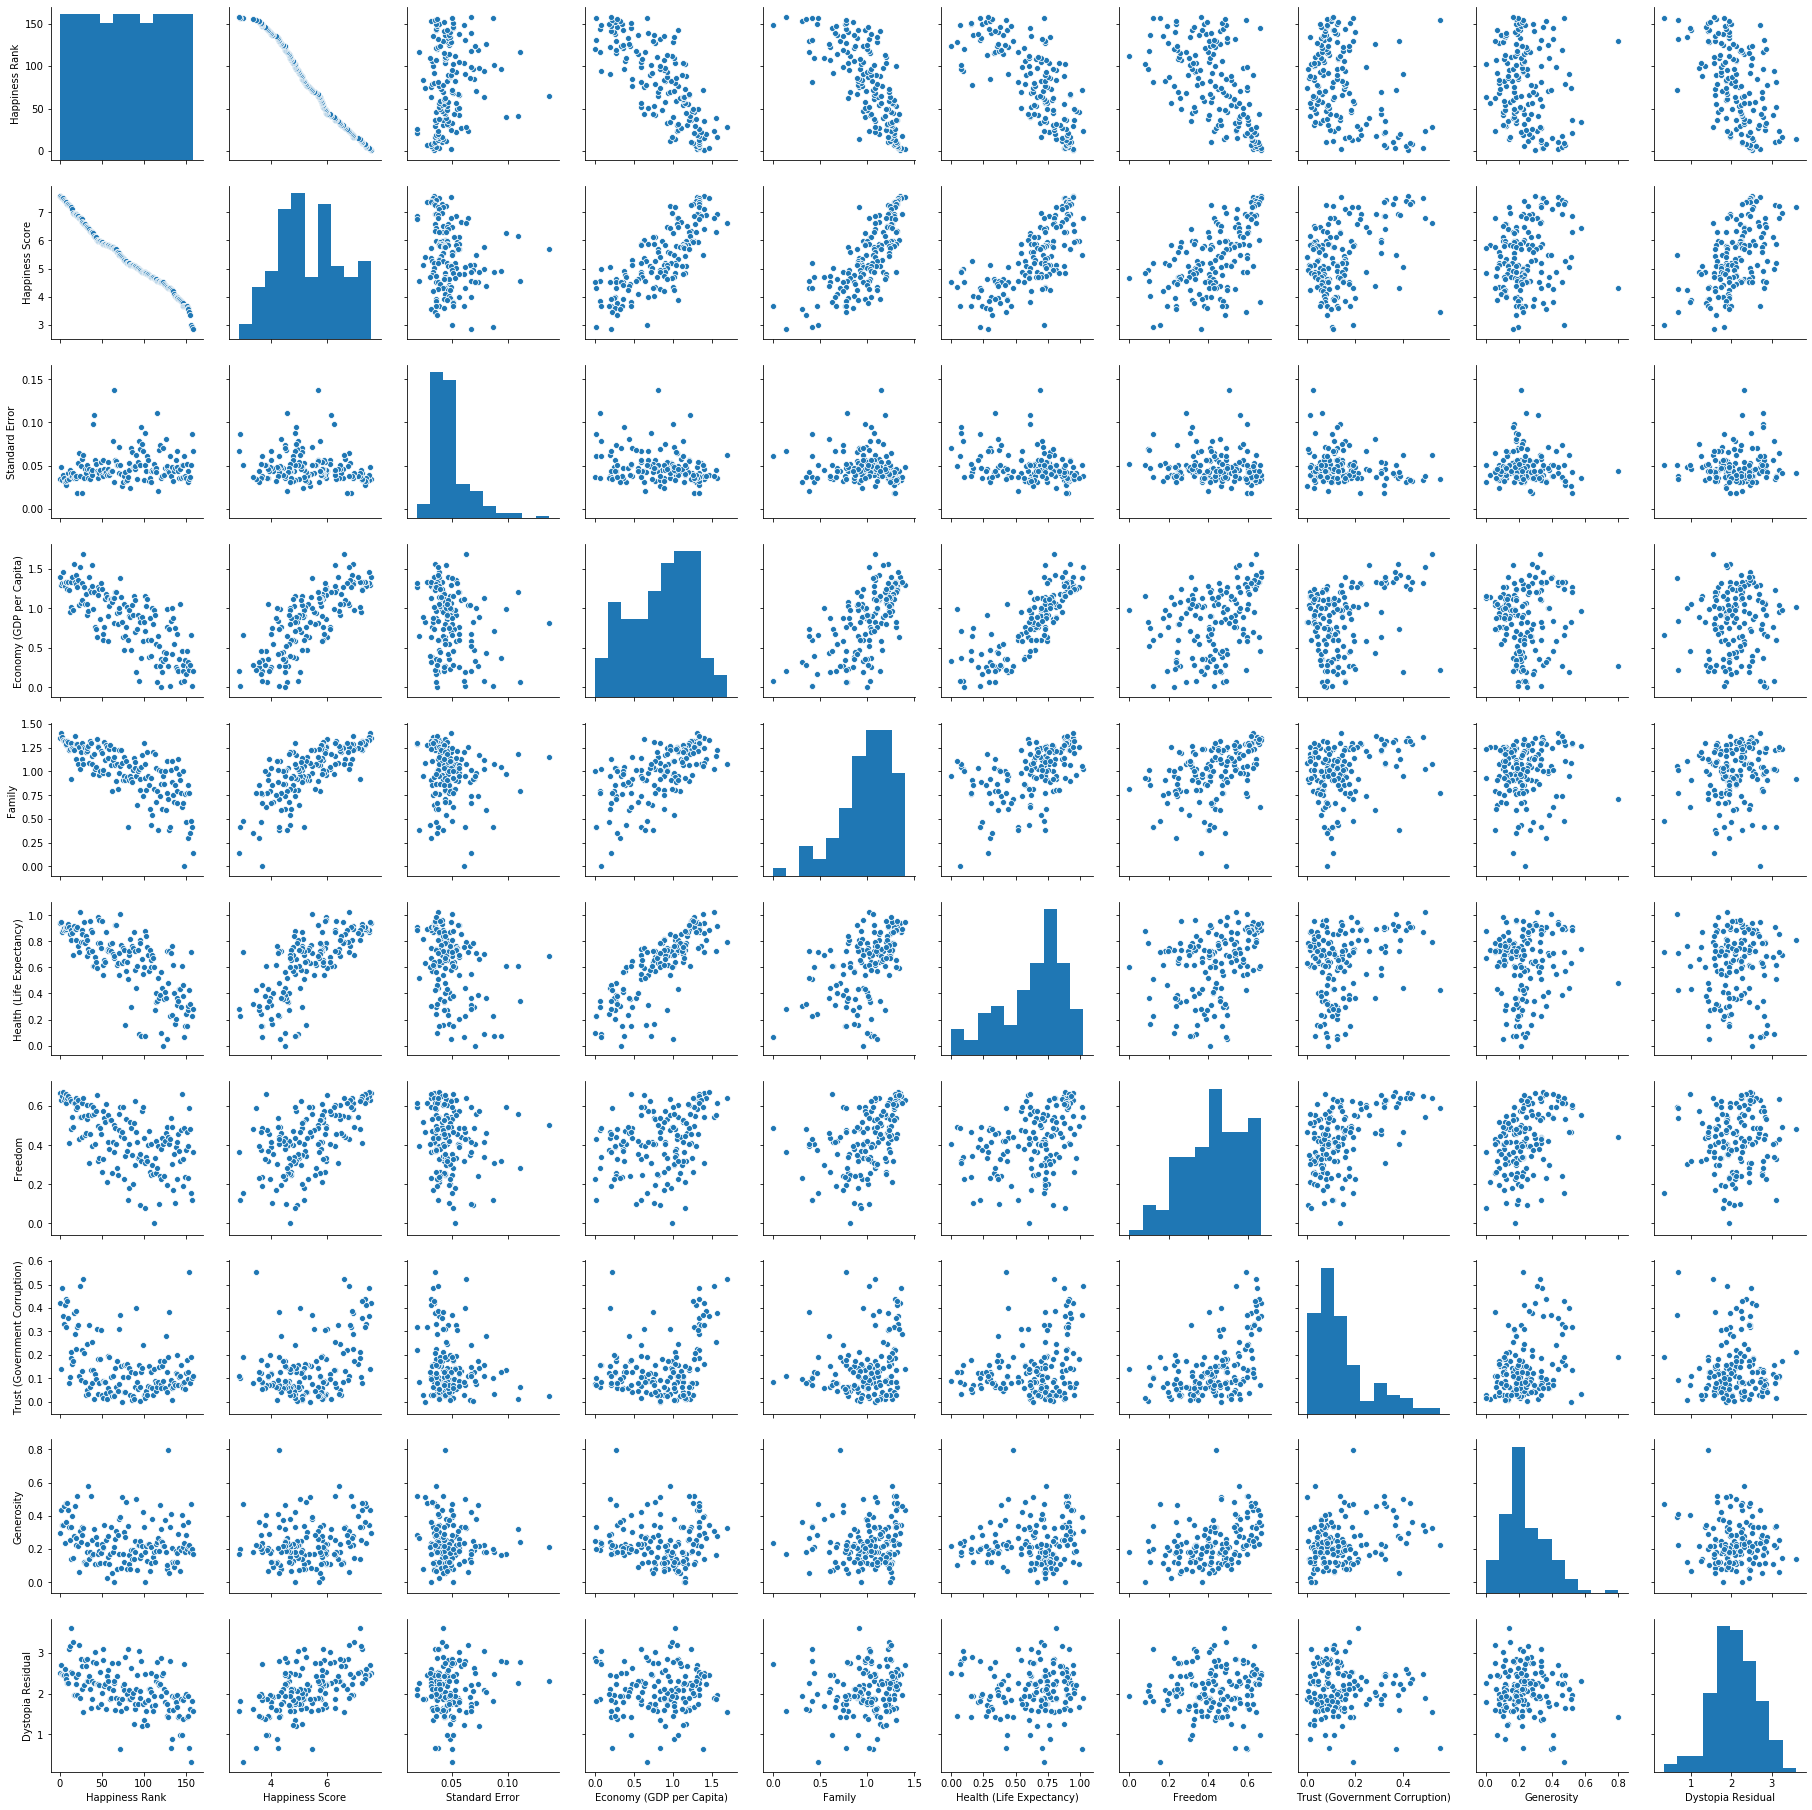

In [64]:
sns.pairplot(hf)

### Checking Outliers

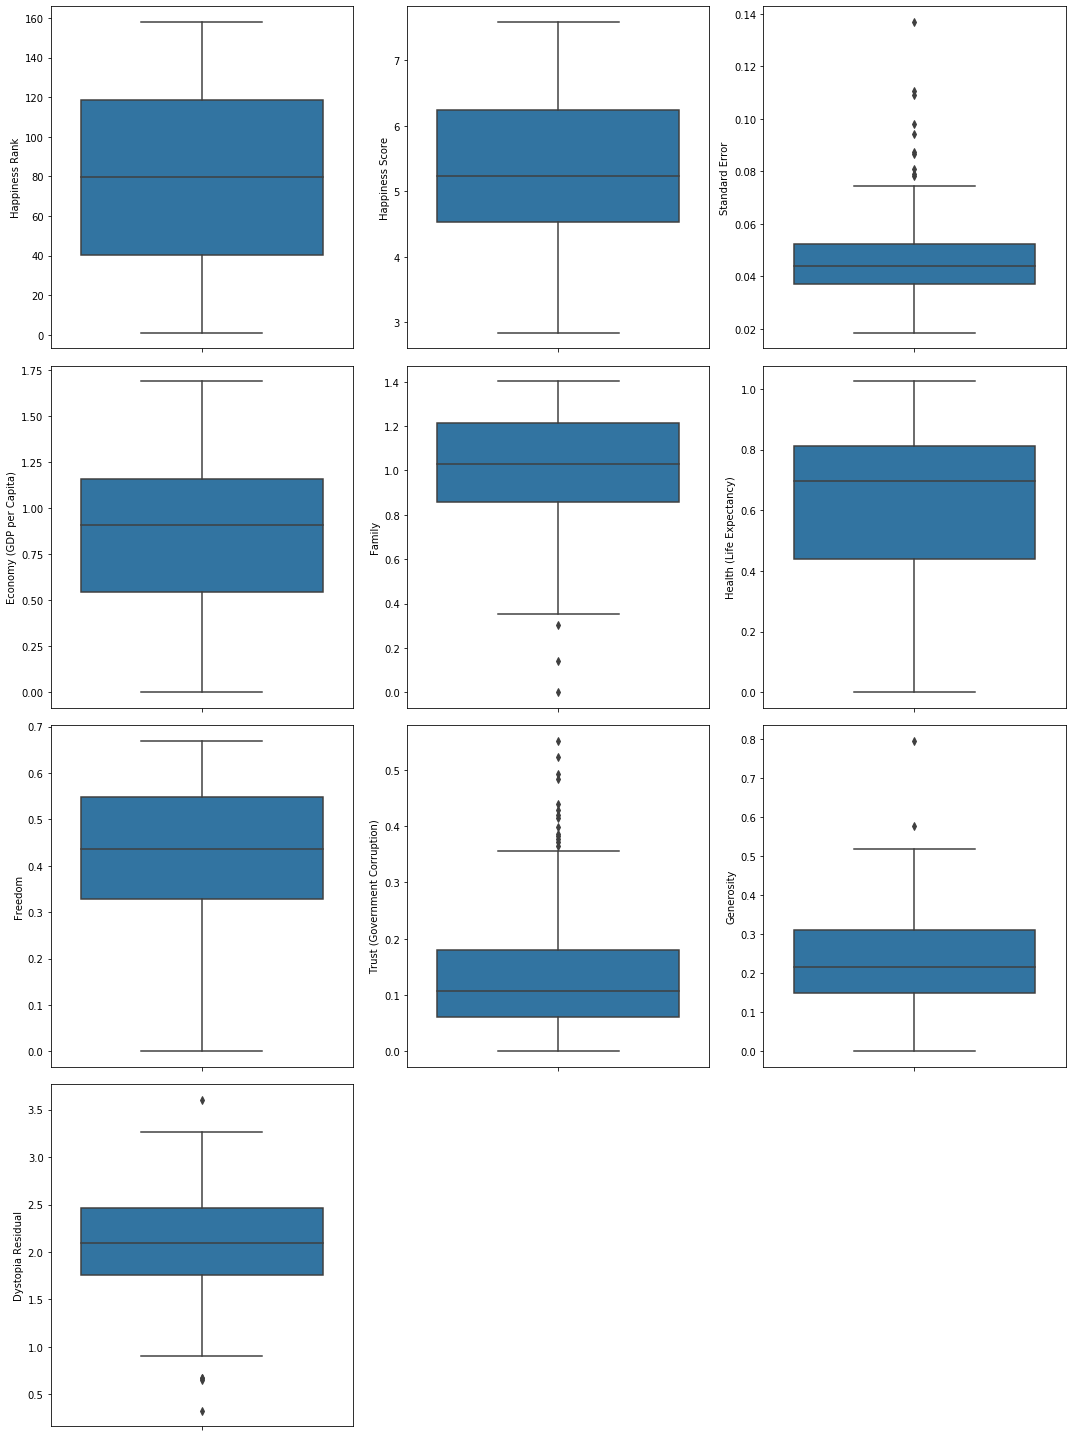

In [154]:
## box plot to check for outliers

plt.figure(figsize= (15,30))


for i,el in enumerate(df._get_numeric_data().columns):
    plt.subplot(6,3,i + 1)
    sns.boxplot(y=el,data=df)
                
                

plt.tight_layout() 

plt.show()

##### Observation:
- Using Box plot we are able to observe multiple features having outliers, these will be removed using zscore

In [43]:
## removing outliers from complete dataframe

from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(new_df._get_numeric_data()))
threshold=3
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))

In [44]:
new_df =df[(z<3).all(axis=1)]

In [45]:
print(df.shape,new_df.shape)

(158, 12) (149, 12)


In [236]:
print(df.skew())
print('*' * 60)
print(new_df.skew())

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64
************************************************************
Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530


In [47]:
new_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


### Transforming and Scaling Dataset

In [50]:
### applying power transformation to remove skewness
import warnings
warnings.filterwarnings('ignore')

power = PowerTransformer()
for i in new_df.columns:
    if np.abs(new_df[i].skew()) > 0.5:
        new_df[[i]] = power.fit_transform(new_df[[i]])

In [51]:
### the skewness has reduced by a considerable factor

print(df.skew())
print('*' * 60)
print(new_df.skew())

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64
************************************************************
Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.317575
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.413462
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual               -0.238911


### Scaling the data with standard scaler

In [55]:
### fitting the linear osm model
target_col = 'Happiness Score'

X = new_df.drop(columns=[target_col])
y = new_df.loc[:,target_col]

In [68]:
scale = StandardScaler()
scaled_data = scale.fit_transform(X)

In [67]:
## now we have standard scaled data
pd.DataFrame(X,columns=new_df.drop(columns=['Happiness Score']).columns)

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.300256,-1.721000,-0.972226,1.369621,1.669206,1.491765,1.577438,1.773991,0.622391,0.758258
1,-0.449465,1.300256,-1.699075,0.309350,1.135226,2.012132,1.532348,1.332456,0.315993,1.480995,1.092857
2,-0.909893,1.300256,-1.677149,-1.062017,1.192861,1.739586,1.085223,1.469659,1.906792,0.927973,0.712335
3,0.581016,1.300256,-1.655224,-0.503610,1.525130,1.553118,1.147600,1.605131,1.624007,0.964080,0.663893
4,-1.194920,-0.040302,-1.633299,-0.823548,1.194876,1.501726,1.270179,1.360416,1.503484,1.592224,0.639337
...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,-0.916014,-1.552987,-0.959885,-0.939459,1.087740,2.012856,0.065304,-2.588925
154,-1.436096,0.965117,1.655501,-0.719479,-1.392303,-1.896644,-1.276496,0.372033,-0.433835,-0.334169,-0.843967
155,1.260695,-0.375441,1.677427,0.399137,-0.455245,-1.690664,0.262933,-1.809238,0.738915,1.659336,-3.208430
156,-1.260695,0.965117,1.699352,1.926902,-2.067566,-1.796803,-1.525700,-2.064472,-0.151946,-0.194829,-0.481985


##### Observation:
- After removing skewness and scaling dataset, we can observe that the multicolinearity has gone down

In [84]:
len(new_df.drop(columns=[target_col]).columns) -3

8

In [85]:
### using PCA to keep data and remove multicolinearity
## as we observed high multicolinearity in three columns , we will reduce 3 features 

pca = PCA(n_components=8)
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)

In [109]:
## visualizing the PCA dataset

df_pca=pd.DataFrame(x_pca,columns=['Feature_'+str(i) for i  in range(0,8)])

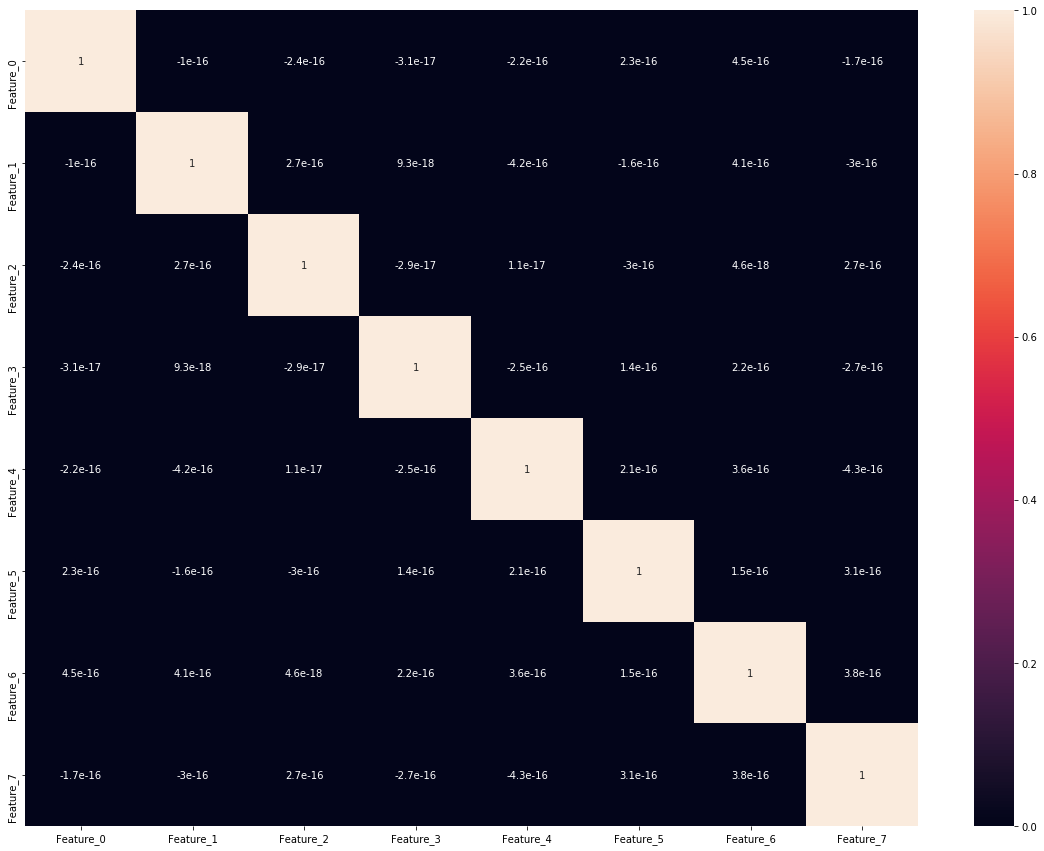

In [112]:
## we can see that multicolinearity  is removed
sns.heatmap(df_pca.corr(),annot=True)    

##### Observation:
- Using PCA to remove multicolinearity

In [101]:
df_comp =pd.DataFrame(pca.components_,columns=new_df.drop(columns=[target_col]).columns)

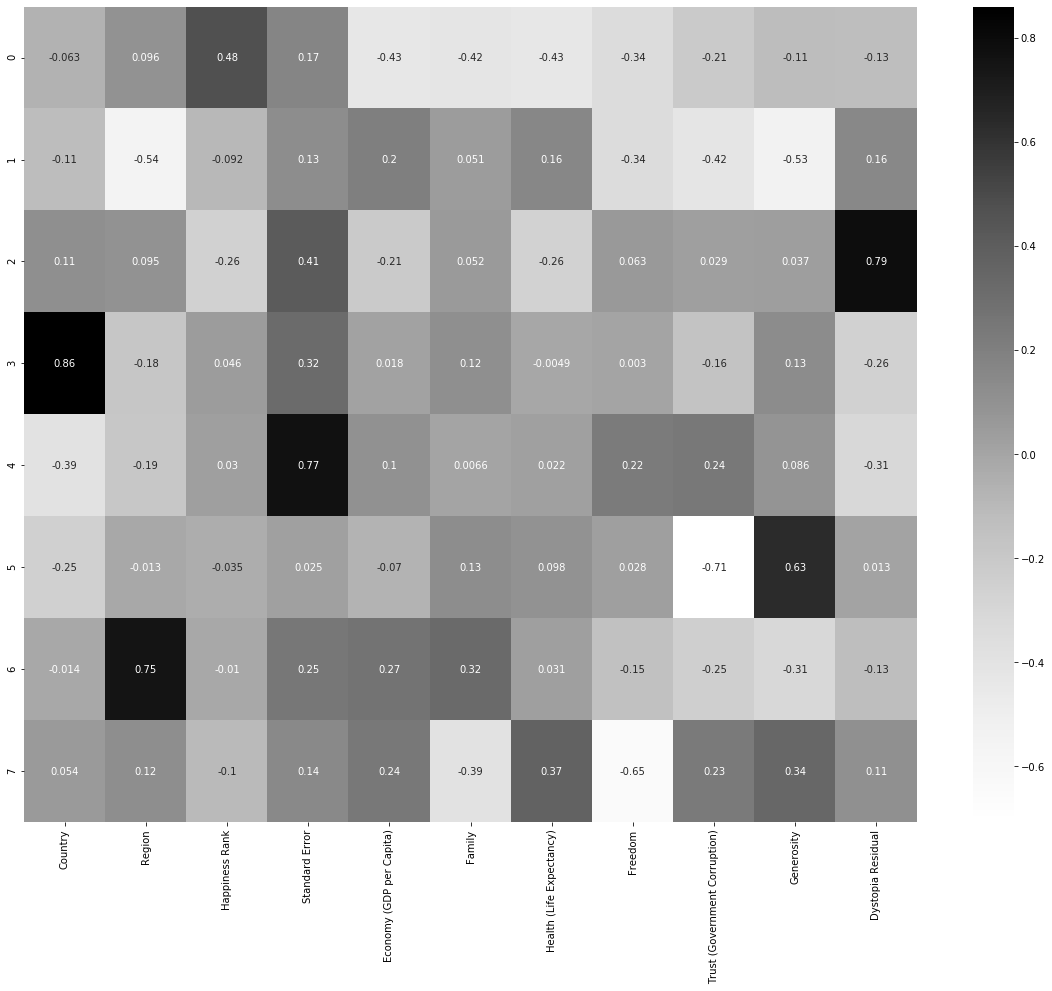

In [105]:
## we can see that multcolinearity is removed

sns.heatmap(df_comp,cmap='Greys',annot=True)    

### Finding the best random state value

In [125]:

def find_best_score():
    randomstate = 0
    max_score = 0
    lr = LinearRegression()
    for i in range(1,800):
        x_train,x_test,y_train,y_test = train_test_split(df_pca,y,test_size=.20,random_state = i)
        lr.fit(x_train,y_train)
        pred = lr.predict(x_test)
        score = r2_score(y_test,pred)
        if(score>max_score):
            max_score = score
            randomstate  = i
            rmse=np.sqrt(mean_squared_error(y_test,pred))
    print( 'Best Random State=',randomstate,' and R2 Score of LR MODEL : ',max_score*100, 'RMSE score :', round(rmse,2))

find_best_score()

Best Random State= 43  and R2 Score of LR MODEL :  99.8210802413675 RMSE score : 0.05


In [158]:
## using the best random state


x_train,x_test,y_train,y_test = train_test_split(df_pca,y,test_size=.20,random_state = 43)



0.998210802413675


In [179]:
np.mean(cross_val_score(lr,scaled_data,y,cv=5,scoring='r2'))

0.8667228280767372

In [189]:
### Findin the best fit model
import numpy as np


model_list = [
    LinearRegression(),
    Lasso(),
    Ridge(alpha=.1),
    ElasticNet(),
    RandomForestRegressor(n_estimators=100),
    SVR(kernel= 'poly',C=1,gamma='scale',degree=3,coef0=10),
    AdaBoostRegressor(n_estimators=100),
    DecisionTreeRegressor(),
    KNeighborsRegressor(n_neighbors=11)
]

index_list = ['LR','LAS','RIDGE','ELN','RF','ABR','SVR','DTR','KNR']

def find_best_model(models,x_train,y_train,x_test,y_test,y):
    r2_scores = []
    cv_scores = []
    mse_scores = []
    rmse_scores = []
    for model in models:
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        score = r2_score(y_test,y_pred)
        mse=mean_squared_error(y_test,y_pred)
        r2_scores.append(score)
        mse_scores.append(mse)
        rmse_scores.append(np.sqrt(mse))
        cv_scores.append(np.mean(cross_val_score(model,scaled_data,y,cv=5,scoring='r2')))
    df = pd.DataFrame(list(zip(r2_scores,cv_scores,mse_scores,rmse_scores)),columns=['R2_Score','CV_Score','MSE_Score','RMSE_Score'],index=index_list)
    df['Score_Diff'] = df['R2_Score'] - df['CV_Score']
    return df

best_mod_df = find_best_model(model_list,x_train,y_train,x_test,y_test,y)

In [190]:
best_mod_df

,R2_Score,CV_Score,MSE_Score,RMSE_Score,Score_Diff
LR,0.998211,0.866723,0.002508,0.050083,0.131488
LAS,0.625011,-17.524824,0.525711,0.725059,18.149835
RIDGE,0.998217,0.866356,0.002500,0.049996,0.131861
ELN,0.745655,-10.872223,0.356576,0.597140,11.617878
RF,0.958752,-1.684356,0.057828,0.240474,2.643107
ABR,0.995019,0.688727,0.006983,0.083561,0.306292
SVR,0.941250,-2.507535,0.082364,0.286991,3.448785
DTR,0.905092,-1.310801,0.133056,0.364768,2.215892
KNR,0.880364,-4.854382,0.167722,0.409539,5.734746


##### Observation:
- The optimal models that we can observe are Linear regression and Ridge regression
- Ther are models with perfect training score and low test score, which shows overfitting in these models

### Hyper Tuning Parameters

In [204]:
## SVR
modelsvr = SVR()
param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},



grids = GridSearchCV(modelsvr,param,cv=5)

grids.fit(df_pca,y)
print(grids.best_params_)

{'C': 5, 'coef0': 0.01, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}


In [220]:
svr_model =SVR(kernel= 'linear',C=5,gamma='auto',degree=3,coef0=0.01)
svr_model.fit(x_train,y_train)
y_pred = svr_model.predict(x_test)
score = r2_score(y_test,y_pred)
print(score)
cross_val =cross_val_score(svr_model,df_pca,y,cv=5,scoring='r2')
print(np.mean(cross_val))

0.9979857074278693
0.8664486488618625


In [228]:
## Ada boost regressor

ada=AdaBoostRegressor()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='r2',n_jobs=1,cv=5)
search.fit(scaled_data,y)



GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000],
                         'random_state': [1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [229]:
search.best_params_

{'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 1}

In [230]:
ada_model =AdaBoostRegressor(learning_rate=0.1,n_estimators=500,random_state=1)
ada_model.fit(x_train,y_train)
y_pred = ada_model.predict(x_test)
score = r2_score(y_test,y_pred)
print(score)
cross_val =cross_val_score(ada_model,scaled_data,y,cv=5,scoring='r2')
print(np.mean(cross_val))

0.9402002075104036
-2.755279045941358


In [218]:
## ridge regression


ridge= Ridge()
params = dict()
params['alpha'] = np.arange(0, 5, 0.01)

search = GridSearchCV(ridge,params,cv=5,scoring='r2')
search.fit(df_pca,y)

search.best_params_


{'alpha': 0.0}

In [222]:
ridge= Ridge(alpha=0)
ridge.fit(x_train,y_train)
y_pred = ridge.predict(x_test)
score = r2_score(y_test,y_pred)
print(score)
cross_val =cross_val_score(ridge,df_pca,y,cv=5,scoring='r2')
print(np.mean(cross_val))


0.998210802413675
0.8618637374910385


In [223]:
## linear regression

lr =LinearRegression()
lr.fit(x_train,y_train)
y_pred= lr.predict(x_test)
score = r2_score(y_test,y_pred)
print(score)
cross_val =cross_val_score(lr,df_pca,y,cv=5,scoring='r2')
print(np.mean(cross_val))




0.998210802413675
0.8618637374910391


### Linear regression is by far the best performing model

In [226]:
pd.DataFrame(list(zip(y_test,y_pred)), columns=['True value','LR_Predicted_value'])

,True value,LR_Predicted_value
0,5.123,5.118982
1,4.839,4.818458
2,3.655,3.639253
3,7.587,7.559424
4,5.212,5.184924
5,5.605,5.574192
6,3.845,3.846904
7,5.286,5.355658
8,6.901,6.789211
9,6.298,6.346101


### Saving model as a Pickle file

In [244]:

joblib.dump(lr,'world_happiest_record_Ridge.pk')

['world_happiest_record_Ridge.pk']

In [245]:
joblib.load('world_happiest_record_Ridge.pk')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)